# Simulating CERNs Particle Accelerator 

**A Computational Essay by Erlend Tiberg North and Linn Margrethe Rykkje, University of Oslo**

## Introduction

The code below aims to simulate a version of CERNs accelerator complex, which, in our simplified model, consists of a linear accelerator (LINAC), a proton synchrotron (PS) and the large hadron collider (LHC).
Initially, the provided code concerned a cyclotron; however, since CERNs actual particle accelerator uses a synchrotron, an adaptation descended from the cyclotron, this is the primary focus of the investigation. 

__Background__

Explained simply, the accelerator complex consists of a sequence of machines that cumulatively accelerate particles close to the speed of light. In the case of protons, the protons are retrieved from a bottle of hydrogen gas by using an electric field to strip away their electrons. LINAC 2, the first accelerator in the chain, accelerates the protons to a determined velocity, before sending the beam into a Proton Synchrotron Booster (PBS), followed by the Proton Synchrotron (PS) and then the Super Proton Synchrotron (SPS). When protons exit the SPS, they are injected into two beam pipes of the LHC at a speed of 0.87c. After further acceleration to their maximum kinetic energy, the beams are brought into collision at a speed of 0.99999c! 

![Diagram of the Cern Complex](https://lhc-machine-outreach.web.cern.ch/lhc-machine-outreach/images/complex/Cern-complex.gif)

__Aim__

Our aim is to simulate the particle accelerator; in doing so we have simplified the complex by only including the first LINAC, the PS and the LHC, although the actual system consists of many more components. We attempted to model LINAC2, the PS and the LHC as closely as possible from real values, but also had to make some assumptions. In the end we consider relativistic factors and compare the effects of these to the perfectly ideal situation. 
 

## Developing the Model

__Linear Accelerator 2__

The regular LINAC uses an electric field, indirectly defined by a potential difference, $U_0$, and accelerates the proton over a given distance $l$ such that it enters the first PS with a speed of $0.3c$. First we need to know what potential difference must be applied in order to achieve this. Using the relation between electric field, potential and force, we derive the following: 


$$ 
F = qE = ma
\\
E = \frac{U_0}{l}
\\
a = \frac{qE}{m} = \frac{qU_0}{lm} 
\\
$$

Then, using motion equations: 
$$
v^2 = v_0 + 2al 
\\
v^2 = 2\frac{qU_0}{lm}l 
\\
U_0 = \frac{1}{2} \frac{mv^2}{q} 
$$

where $v$ is the desired final speed. 

We import the standard libraries and define the input variables for the potential to calculate the initial voltage. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

"""Defining variables for LINAC2"""
c = 2.99*10**8 #Set the speed of light
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m0 = 1.67e-27 #Set mass of the particle to the mass of a proton

v0 = 0.3*c #Set wanted exit speed of LINAC2
l0 = 500 #Set length of LINAC2
U0 = 1/2*(m0*v0**2)/(q) #Set voltage of LINAC2
print("Voltage of LINAC2 is: %e V" % U0)

Voltage of LINAC2 is: 4.199053e+07 V


__Proton Synchrotron__

The PS accelerates the protons whilst also keeping them on a circular path with constant radius, as opposed to the cyclotron where the particles spiral outwards. In our model, the protons are briefly accelerated by a "mini-LINAC" before passing through a set of dipoles. These dipoles are what keep the radius of the motion constant; they direct the beams around the ring by applying a magnetic field proportional to the velocity of the protons. In real life, CERNs PS consists of 100 of such dipoles in addition to 277 conventional electromagnets, distributed over a circumference of 628 meters. Since the conventional electromagnets' sole purpose is to focus the protons into a fine beam, we decided to not include them in our model. We also assume that the mini-LINAC and dipole appear alternatingly. 

Since the protons' velocity increase in each mini-LINAC, the magnetic field strength must increase proportionately to keep bending the beam the same number of degrees. We thus need a magnetic field strength that varies with the velocity $v$. 

For the protons to stay on a circular path, they must have a sentripetal acceleration, which we want the magnetic force to be responsible for; i.e. the magnetic force points radially in towards the center of the PS. The relevant velocity will always be tangential to the circle and thus perpendicular to the magnetic force. If the protons circulate clockwise, the magnetic field we set up must be in the positive $\hat{z}$-direction (out of the plane). 

First considering the magnitudes we find that the magnetic field strength must be given by, 


$$
F = ma = qvB = m\frac{v^2}{r} \\
B = \frac{mv}{qr} \\
\implies \vec{B} = \frac{mv}{qr} \hat{z}
$$


Again, we set the condition that the protons must reach a desired velocity (this time 0.87c) before they are released to the LHC through a proton transfer tube (PTT). This time we choose the potential difference arbitrarily.  


In [2]:
"""Defining variables for the PS"""
v1 = 0.87*c #Set wanted exit speed of PS
l1 = 3 #Set length of MINI-LINACs for the PS
U1 = 4.2e4 #Set voltage of MINI-LINACs for the PS
print("Voltage of PS is: %e V"  % U1)
r1 = 1000 #Set radius of PS

Voltage of PS is: 4.200000e+04 V


__Large Hadron Collider__ 

The LHC is modeled in the same manner as the PS. With a circumference of 27km, it is much larger than the PS and is capable of accelerating the protons to a speed of $0.99999c$. In the LHC, there are two beams of protons that travel in opposite directions so that when the desired speed is reached, the two beams are made to collide at the position of a particle detector. 

In [3]:
"""Defining variables for the LHC"""
v2 = c #Set wanted speed achieved in the LHC
l2 = 3 #Set length of MINI-LINACs for the LHC
U2 = 2.5e3 #Set voltage of MINI-LINACs for the LHC
print("Voltage of LHC is: %e V\n" % U2)
r2 = 4250 #Set radius of LHC

Voltage of LHC is: 2.500000e+03 V



## Simulation of the Particle Accelerator

First we set up the needed variables and arrays for the simulation. 

In [4]:
"""Initializing simulation"""

t = 0 #Initialize time to 0
dt = 5e-9 #Set timestep to 5 nanoseconds

particlepos = np.array([0.0,0.0,0.0]) #Set the initial postition of the particle, starting in LINAC2
particlev = np.array([1e-12,1e-12,0.0]) #Set the initial speed of the particle, starting from rest in LINAC2

Although the proton is supposed to start from rest in LINAC2, it needs a small initial velocity to avoid computing-error when calculating the norm of the vector in the function for LINAC. 

We decided to write functions for the LINAC and PS, as this enables us to more easily call on them with varying input variables. Both functions utilize Euler's method; first calculating the force acting on the protons (electric in the LINAC and electromagnetic in the PS) and then estimating the acceleration, velocity and position by integrating in time. 



In [5]:
"""Function for LINAC"""
def linac(U,l,m0,q,pos,v,v1,t,dt):

    posx = [pos[0]]
    posy = [pos[1]]
    speed = [np.linalg.norm(v)]
    i = 0

    while (np.linalg.norm(v) < v1):

        Fnet = (U*q)/l * v/np.linalg.norm(v)

        v = v + Fnet*dt/m0
        pos = pos + v*dt

        posx = np.append(posx,pos[0])
        posy = np.append(posy,pos[1])
        speed = np.append(speed, np.linalg.norm(v))

        i += 1
        t += dt

        if np.linalg.norm(v) >= v1:
            print("Reached %.0f m" % np.linalg.norm(pos))
            print("Reached %.2f%% of light speed in %0.f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))
            break
        elif np.linalg.norm(pos) >= l - 1E-5:
            print("Did not reach speed in 50 m")
            print("Final speed was %.2f%% of light speed in %0.f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))
            break
            
    return posx, posy, pos, v, speed, t

In [6]:
"""Function for a synchrotron"""
def synchrotron(r,l,U,pos,v,v1,m0,q,clockwise,t,dt,t0):
    """Simulation of a Synchrotron. Calculates the forces on a particle from a
    mini-LINAC and from a dipole, and integrates its motion by utilizing Euler"""
    posx = [pos[0]]
    posy = [pos[1]]
    speed = [np.linalg.norm(v)]
    i = 0

    while (np.linalg.norm(v) < v1):
        
        if clockwise:
            B = np.array([0.0,0.0,(m0*np.linalg.norm(v))/(q*r)])
        else:
            B = np.array([0.0,0.0,-(m0*np.linalg.norm(v))/(q*r)])
        
        Fnet = (U*q)/l * (v)/(np.linalg.norm(v))
        Fnet += q*np.cross(v,B)

        v = v + Fnet*dt/m0
        pos = pos + v*dt

        posx = np.append(posx,pos[0])
        posy = np.append(posy,pos[1])
        speed = np.append(speed, np.linalg.norm(v))

        t += dt
        i += 1

        if i >= 100000:
            print("Did not reach %.f%% of light speed within %0.f iterations" % ((np.linalg.norm(v1)/c*100),i))
            break

    print("Reached %.2f%% of light speed in %.0f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))

    return posx, posy, pos, v, speed, t

Now we can actually make use of everything! 

We call on the functions for each component of the particle accelerator and store the returned arrays/lists for plotting purposes. 

In [7]:
"""Calling on functions for all components"""

#Linear Accelerator 2
print("\nLINAC2:")
particleposxLINAC2, particleposyLINAC2, particlepos, particlev, particlespeedLINAC2, t  = linac(U0,l0,m0,q,particlepos,particlev,v0,t,dt) #Calls the linac function with given variables to simulate CERN's LINAC2
t0 = t

#Proton Synchrotron
print("\nProton Synchrotron:")
particleposxPS, particleposyPS, particlepos, particlev, particlespeedPS, t = synchrotron(r1,l1,U1,particlepos,particlev,v1,m0,q,False,t,dt,-1) #Calls the synchrotron function with given variables to simulate CERN's Proton Synchrotron
t1 = t

#Proton Transfer Tube
print("\nProton Transfer Tube:")
particleposxPTT = [particlepos[0]]
particleposyPTT = [particlepos[1]]
for i in range(500):
    particlepos += particlev*dt #Integrate the position of a particle using Euler
    particleposxPTT = np.append(particleposxPTT, particlepos[0]) #append the x position to the x-position list
    particleposyPTT = np.append(particleposyPTT, particlepos[1]) #append the y position to the y-position list
    t += dt
print("Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider")

#Large Hadron Collider
print("\nLarge Hadron Collider:")
particleposxLHC, particleposyLHC, particlepos, particlev, particlespeeedLHC, t = synchrotron(r2,l2,U2,particlepos,particlev,c,m0,q,True,t,dt,-1)



LINAC2:
Reached 500 m
Reached 30.00% of light speed in 2230 iterations. Time passed: 1.12e-05 seconds

Proton Synchrotron:
Reached 87.00% of light speed in 25103 iterations. Time passed: 1.37e-04 seconds

Proton Transfer Tube:
Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider

Large Hadron Collider:
Reached 100.00% of light speed in 93793 iterations. Time passed: 6.08e-04 seconds


Lastly, we'd like to observe the motion of the protons as they move through the particle accelerator complex. The first code below is a simple 2-dimensional plot showing the x- and y-position of the protons.

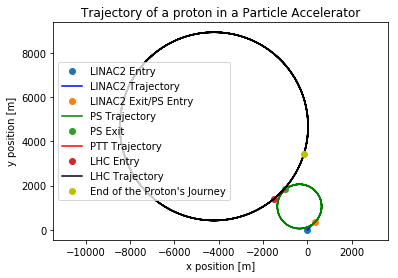

In [8]:
"""Regular plot showing motion, non-relativistic"""
plt.plot(particleposxLINAC2[0], particleposyLINAC2[0], "o", label="LINAC2 Entry")
plt.plot(particleposxLINAC2, particleposyLINAC2, "b", label="LINAC2 Trajectory") #create the plot
plt.plot(particleposxLINAC2[-1], particleposyLINAC2[-1], "o", label="LINAC2 Exit/PS Entry")

plt.plot(particleposxPS, particleposyPS, "g", label="PS Trajectory") #create the plot
plt.plot(particleposxPS[-1], particleposyPS[-1], "o", label="PS Exit")

plt.plot(particleposxPTT, particleposyPTT, "r", label="PTT Trajectory") #create the plot

plt.plot(particleposxLHC[0], particleposyLHC[0], "o", label="LHC Entry")
plt.plot(particleposxLHC, particleposyLHC, "k" , label="LHC Trajectory") #create the plot
plt.plot(particleposxLHC[-1], particleposyLHC[-1], "oy", label="End of the Proton's Journey")

plt.xlabel("x position [m]")
plt.ylabel("y position [m]")
plt.title("Trajectory of a proton in a Particle Accelerator")
plt.legend()
plt.axis("equal")
plt.show()

## Considering Relativistic Factors

In the model above, we have neglected the effect of relativistic factors despite the fact that the protons travel at incredibly high speeds. By including the Lorentz factor, $\gamma$, we can see what impact a relativistic increase in mass has on the proton's motion and velocity. The Lorentz factor is defined as the following: 

$$
\gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}
$$

The relativistc mass $m$ is given by the Lorentz factor and the mass at rest, $m_0$: 

$$
m = \gamma m_0
$$

To implement these changes, we create new simulation variables and arrays, and write a function for the Lorentz factor.  


In [10]:
"""Initializing relativistic simulation"""
tr = 0 #initialize time to 0 (relativistic)
dtr = 5e-9 #Set timestep to 50 nanoseconds (relativistic)

particleposr = np.array([0.0,0.0,0.0]) #Set the initial postition of the particle (relativistic)
particlevr = np.array([1e-12,1e-12,0.0]) #Set the initial speed of the particle (relativistic)

def gamma(v):
    """A simple function to return the Lorentz factor for a given velocity"""
    return (1)/(np.sqrt(1-(np.linalg.norm(v)**2)/(c**2)))

The core of the functions remain the same, but we want to be able to dictate whether relativistic factors should or should not be included by issuing an if/else-statement. 

In [11]:
"""Relativistic function for the LINAC"""

def linac(U,l,m0,q,pos,v,v1,relativistic,t,dt,t0):
    """Simulates a Linear Accelerator by calculating the net force on
       a particle and integrating its motion with Euler"""
    posx = [pos[0]]
    posy = [pos[1]]
    speed = [np.linalg.norm(v)]
    i = 0

    while (np.linalg.norm(v) < v1):
        if relativistic:
            m = gamma(v)*m0
            if t==t0:
                print("Speed at non-relativistic end-time for %.f%% of light speed was %.2f%% of light speed" % ((np.linalg.norm(v1)/c*100),(np.linalg.norm(v)/c*100)))
        else:
            m = m0
        Fnet = (U*q)/l * v/np.linalg.norm(v)

        v = v + Fnet*dt/m
        pos = pos + v*dt

        posx = np.append(posx,pos[0])
        posy = np.append(posy,pos[1])
        speed = np.append(speed, np.linalg.norm(v))

        i += 1
        t += dt

        if np.linalg.norm(v) >= v1:
            print("Reached %.0f m" % np.linalg.norm(pos))
            print("Reached %.2f%% of light speed in %0.f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))
            break
        elif np.linalg.norm(pos) >= l - 1E-5:
            print("Did not reach speed in 50 m")
            print("Final speed was %.2f%% of light speed in %0.f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))
            break

    return posx, posy, pos, v, speed, t

In [12]:
"""Relativistic function for a synchrotron"""

def synchrotron(r,l,U,pos,v,v1,m0,q,clockwise,relativistic,t,dt,t0):
    """Simulation of a Synchrotron. Calculates the forces on a particle from a
    mini-LINAC and from a dipole, and integrates its motion by utilizing Euler"""
    posx = [pos[0]]
    posy = [pos[1]]
    speed = [np.linalg.norm(v)]
    i = 0

    while (np.linalg.norm(v) < v1):
        if relativistic:
            m = gamma(v)*m0
            if t==t0:
                print("Speed at non-relativistic end-time for %.f%% of light speed was %.2f%% of light speed" % ((np.linalg.norm(v1)/c*100),(np.linalg.norm(v)/c*100)))
        else:
            m = m0
        Fnet = (U*q)/l * (v)/(np.linalg.norm(v))
        if clockwise:
            B = np.array([0.0,0.0,(m*np.linalg.norm(v))/(q*r)])
        else:
            B = np.array([0.0,0.0,-(m*np.linalg.norm(v))/(q*r)])

        Fnet += q*np.cross(v,B)

        v = v + Fnet*dt/m
        pos = pos + v*dt

        posx = np.append(posx,pos[0])
        posy = np.append(posy,pos[1])
        speed = np.append(speed, np.linalg.norm(v))

        t += dt
        i += 1

        if i >= 100000:
            print("Did not reach %.f%% of light speed within %0.f iterations" % ((np.linalg.norm(v1)/c*100),i))
            break

    print("Reached %.2f%% of light speed in %.0f iterations. Time passed: %.2e seconds" % ((np.linalg.norm(v)/c*100), i, t))

    return posx, posy, pos, v, speed, t

We now call on the functions both with and without relativistic factors. This is because we want to compare the velocity when relativistic factors are included at the time when the protons reach their desired final speed ($0.99999c$) without relativistic factors. 

In [13]:
"""Calling on non-relativistic functions"""

print("\n\nNon-relativistic")

#Linear Accelerator 2
print("\nLINAC2:")
particleposxLINAC2, particleposyLINAC2, particlepos, particlev, particlespeedLINAC2, t  = linac(U0,l0,m0,q,particlepos,particlev,v0,False,t,dt,-1) #Calls the linac function with given variables to simulate CERN's LINAC2
t0 = t

#Proton Synchrotron
print("\nProton Synchrotron:")
particleposxPS, particleposyPS, particlepos, particlev, particlespeedPS, t = synchrotron(r1,l1,U1,particlepos,particlev,v1,m0,q,False,False,t,dt,-1) #Calls the synchrotron function with given variables to simulate CERN's Proton Synchrotron
t1 = t

#Proton Transfer Tube
print("\nProton Transfer Tube:")
particleposxPTT = [particlepos[0]]
particleposyPTT = [particlepos[1]]
for i in range(500):
    particlepos += particlev*dt #Integrate the position of a particle using Euler
    particleposxPTT = np.append(particleposxPTT, particlepos[0]) #append the x position to the x-position list
    particleposyPTT = np.append(particleposyPTT, particlepos[1]) #append the y position to the y-position list
    t += dt
print("Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider")

#Large Hadron Collider
print("\nLarge Hadron Collider:")
particleposxLHC, particleposyLHC, particlepos, particlev, particlespeeedLHC, t = synchrotron(r2,l2,U2,particlepos,particlev,v2,m0,q,True,False,t,dt,-1) #Calls the synchrotorn function with given variables to simulate CERN's Large Hadron Collider
t2 = t

print("\nAction Report:")
print("The final speed of the proton was %.2f%% of light speed.  The Lorentz factor was %.2f" %(np.linalg.norm(particlev)/c*100, gamma(np.linalg.norm(particlev))))
print("Time used was %e seconds " % t)

"""Calling on relativistic functions"""

print("\n\nRelativistic")

#Linear Accelerator 2
print("\nLINAC2:")
particleposxLINAC2r, particleposyLINAC2r, particleposr, particlevr, particlespeedLINAC2r, tr  = linac(U0,l0,m0,q,particleposr,particlevr,v0,True,tr,dtr,t0) #Calls the linac function with given variables to simulate CERN's LINAC2 (relativistic)

#Proton Synchrotron
print("\nProton Synchrotron:")
particleposxPSr, particleposyPSr, particleposr, particlevr, particlespeedPSr, tr = synchrotron(r1,l1,U1,particleposr,particlevr,v1,m0,q,False,True,tr,dtr,t1) #Calls the synchrotron function with given variables to simulate CERN's Proton Synchrotron (relativistic)

#Proton Transfer Tube
print("\nProton Transfer Tube:")
particleposxPTTr = [particleposr[0]]
particleposyPTTr = [particleposr[1]]
for i in range(500):
    particleposr += particlevr*dtr #Integrate the position of a particle using Euler
    particleposxPTTr = np.append(particleposxPTTr, particleposr[0]) #append the x position to the x-position list
    particleposyPTTr = np.append(particleposyPTTr, particleposr[1]) #append the y position to the y-position list
    tr += dtr
print("Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider")

#Large Hadron Collider
print("\nLarge Hadron Collider:")
particleposxLHCr, particleposyLHCr, particleposr, particlevr, particlespeeedLHCr, tr = synchrotron(r2,l2,U2,particleposr,particlevr,v2,m0,q,True,True,tr,dtr,t2) #Calls the synchrotorn function with given variables to simulate CERN's Large Hadron Collider (relativistic)

print("\nAction Report:")
print("The final speed of the proton was %.2f%% of light speed.  The Lorentz factor was %.2f" %(np.linalg.norm(particlevr)/c*100, gamma(np.linalg.norm(particlevr))))
print("Time used was %e seconds " % tr)



Non-relativistic

LINAC2:

Proton Synchrotron:
Reached 100.00% of light speed in 0 iterations. Time passed: 6.08e-04 seconds

Proton Transfer Tube:
Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider

Large Hadron Collider:
Reached 100.00% of light speed in 0 iterations. Time passed: 6.11e-04 seconds

Action Report:
The final speed of the proton was 100.00% of light speed.  The Lorentz factor was nan
Time used was 6.106300e-04 seconds 


Relativistic

LINAC2:
Did not reach speed in 50 m
Final speed was 29.66% of light speed in 2238 iterations. Time passed: 1.12e-05 seconds

Proton Synchrotron:


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


Reached 87.00% of light speed in 32919 iterations. Time passed: 1.76e-04 seconds

Proton Transfer Tube:
Transfered Proton successfully from Proton Synchrotron to Large Hadron Collider

Large Hadron Collider:
Speed at non-relativistic end-time for 100% of light speed was 92.45% of light speed
Did not reach 100% of light speed within 100000 iterations
Reached 93.18% of light speed in 100000 iterations. Time passed: 6.78e-04 seconds

Action Report:
The final speed of the proton was 93.18% of light speed.  The Lorentz factor was 2.76
Time used was 6.782850e-04 seconds 


The resulting motion now changes, as we can also observe in the plot below. 

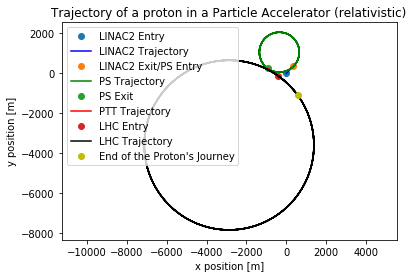

In [14]:
"""Plot showing x and y, relativstic"""
plt.plot(particleposxLINAC2r[0], particleposyLINAC2r[0], "o", label="LINAC2 Entry")
plt.plot(particleposxLINAC2r, particleposyLINAC2r, "b", label="LINAC2 Trajectory") #create the plot
plt.plot(particleposxLINAC2r[-1], particleposyLINAC2r[-1], "o", label="LINAC2 Exit/PS Entry")

plt.plot(particleposxPSr, particleposyPSr, "g", label="PS Trajectory") #create the plot
plt.plot(particleposxPSr[-1], particleposyPSr[-1], "o", label="PS Exit")

plt.plot(particleposxPTTr, particleposyPTTr, "r", label="PTT Trajectory") #create the plot

plt.plot(particleposxLHCr[0], particleposyLHCr[0], "o", label="LHC Entry")
plt.plot(particleposxLHCr, particleposyLHCr, "k" , label="LHC Trajectory") #create the plot
plt.plot(particleposxLHCr[-1], particleposyLHCr[-1], "oy", label="End of the Proton's Journey")

plt.xlabel("x position [m]")
plt.ylabel("y position [m]")
plt.title("Trajectory of a proton in a Particle Accelerator (relativistic)")
plt.legend()
plt.axis("equal")
plt.show()

## Conclusion

We feel that our attempt at creating a (very) simplified model of the particle accelerator was quite successful. Despite lacking many of the actual components, the simulation is able to imitate the workings of the complex to successively accelerate the proton. The implementation of the magnetic field to rotate the path of the protons was perhaps the least accurate one, as we could not find any detailed information regarding the set-up of the dipoles. However, it seems that the protons stay on their circular path while accelerating to the desired end speed, which is what we wanted.  

From the investigation we were able to observe the effects of varying the diffrent physical parameters that were sent as input arguments to the accelerators. With voltages as defined in the program above, the protons reach $0.99999c$ in 61 milliseconds when relativistic factors are ignored. However, when taking these into account, the protons are not able to reach the desired end-speed even in the first LINAC and move at 93.18% of the speed of light at the time when non-relativistic protons achieve 99.999%. 

The exit position of the protons differs when relativistic factors are included because more time is required to reach the desired exit-velocity. However, it is not realistic that the protons leave its accelerator immediately when this velocity is achieved. An improvement to the model would be to define the exit-position and keep the protons circulating with the final velocity until this positioned was reached. It would then be possible to compare how many rounds in the PS and the HLC were needed when relativistic factors were and were not included.  